## Assignment - 2 - Who survived of Titanic

### 1. Reading data from the dataset

In [233]:
#import pandas module
import pandas as pd

In [234]:
#Please place train.csv in same folder as this notebook and test
passenger_ds = pd.read_csv('train.csv')
passenger_ds.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 2. Describing the data

In [235]:
passenger_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


#### Looking at above two outputs we divide column types into below categories:

##### Categorical variables:

    Name, Sex, Ticket, Cabin, Embarked

##### Numerical variables:
    PassengerId, Pclass, Age, SibSp, Parch, Fare

In [236]:
#Describe the data set - describe() method can show count, mean, standard deviation.
#This will give us quick overview of data distribution for columns and their statistical charecteristics

passenger_ds.describe(include=None) #None for numerical types

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [237]:
#['0'] for Categorical types

passenger_ds.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Cor, Mr. Liudevit",male,CA. 2343,G6,S
freq,1,577,7,4,644


In [238]:
#Number of nulls
passenger_ds.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### 3. Analysis of data - Relationship between features and Survival

#### a) Pclass vs Survival - graphical and group by

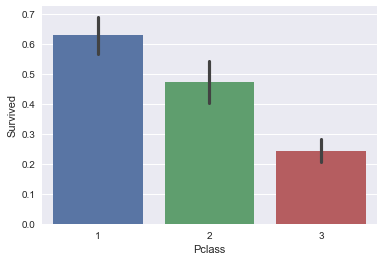

In [239]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set()
sns.barplot(x='Pclass', y='Survived', data=passenger_ds)
plt.show()

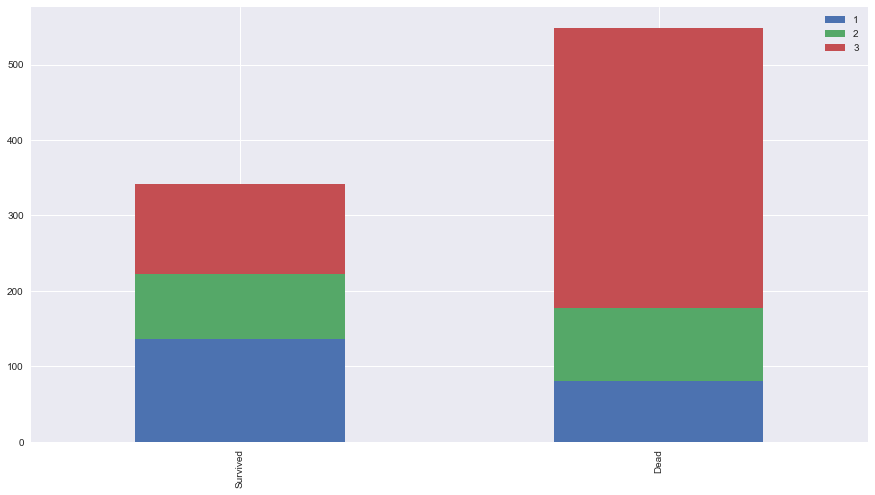

In [240]:
#Another view
survived = passenger_ds[passenger_ds['Survived']==1]['Pclass'].value_counts()
dead = passenger_ds[passenger_ds['Survived']==0]['Pclass'].value_counts()
df = pd.DataFrame([survived,dead])
df.index = ['Survived','Dead']
df.plot(kind='bar',stacked=True, figsize=(15,8))

In [241]:
# group by
passenger_ds[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


#### Observation : From both the analysis (graphical and group by) passengers travelling in higher class have better survival rate.

#### b) Sex vs Survival - graphical and group by

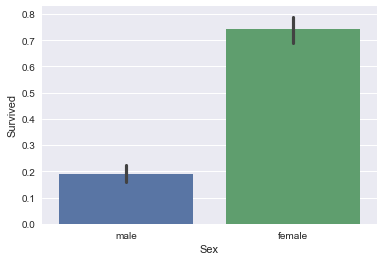

In [242]:
sns.barplot(x='Sex', y='Survived', data=passenger_ds)
plt.show()

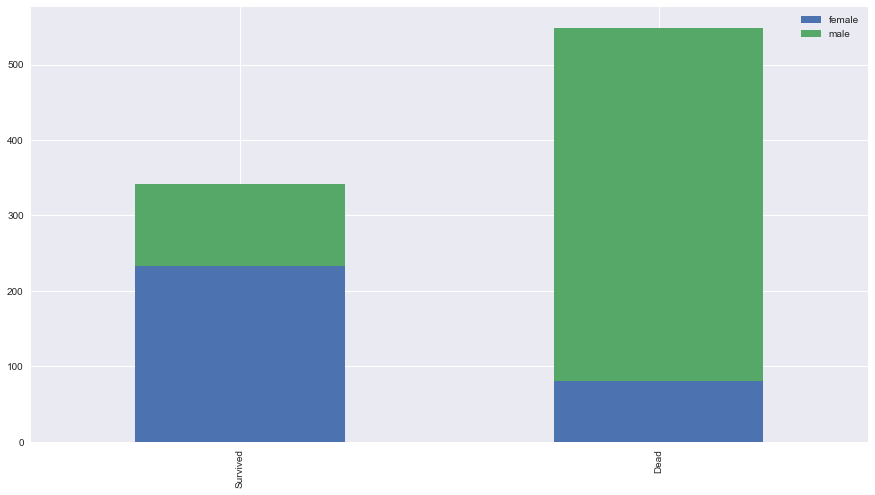

In [243]:
#Another view
survived = passenger_ds[passenger_ds['Survived']==1]['Sex'].value_counts()
dead = passenger_ds[passenger_ds['Survived']==0]['Sex'].value_counts()
df = pd.DataFrame([survived,dead])
df.index = ['Survived','Dead']
df.plot(kind='bar',stacked=True, figsize=(15,8))

In [244]:
passenger_ds[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


#### Observation : From both the analysis (graphical and group by) female passengers have better survival rate than male passengers.

#### c) Embarked vs Survival - graphical and group by

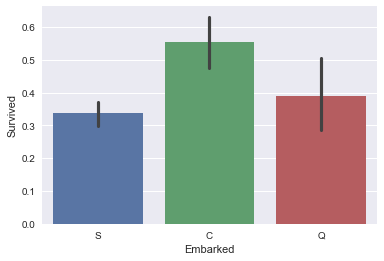

In [245]:
sns.barplot(x='Embarked', y='Survived', data=passenger_ds)
plt.show()

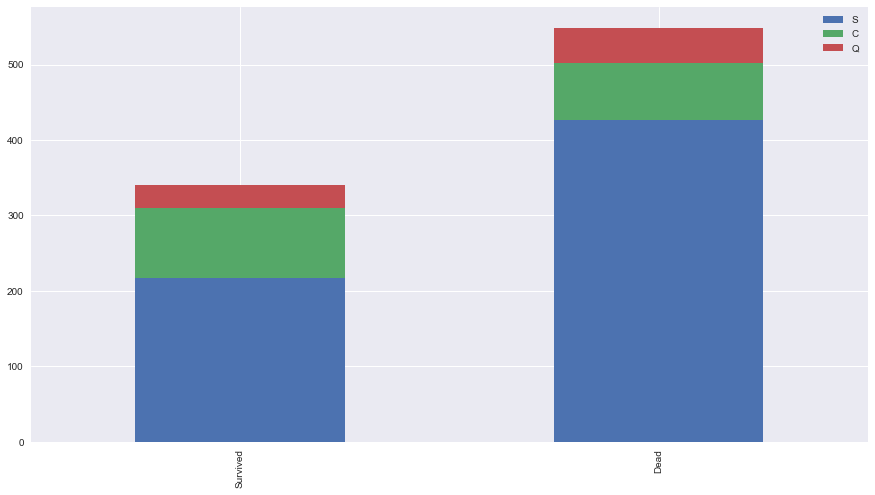

In [246]:
#Another view
survived = passenger_ds[passenger_ds['Survived']==1]['Embarked'].value_counts()
dead = passenger_ds[passenger_ds['Survived']==0]['Embarked'].value_counts()
df = pd.DataFrame([survived,dead])
df.index = ['Survived','Dead']
df.plot(kind='bar',stacked=True, figsize=(15,8))

In [247]:
passenger_ds[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean()

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


#### Observation : From above analysis (graphical and group by) passengers embarking from port 'C' have better survival rate than other passengers.

#### d) Parch vs Survival - graphical and group by

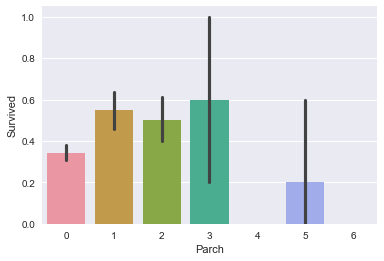

In [248]:
sns.barplot(x='Parch', y='Survived', data=passenger_ds)
plt.show()

In [249]:
passenger_ds[['Parch', 'Survived']].groupby(['Parch'], as_index=False).mean().sort_values('Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


#### e) SibSp vs Survival - graphical and group by

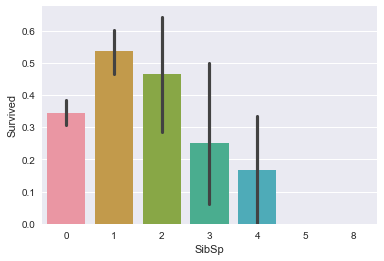

In [250]:
sns.barplot(x='SibSp', y='Survived', data=passenger_ds)
plt.show()

In [251]:
passenger_ds[['SibSp', 'Survived']].groupby(['SibSp'], as_index=False).mean().sort_values('Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


#### Observation : From above analysis (graphical and group by) family size of 2-4 have better survival than singleton or large family.

#### d) Fare vs Survival - graphical

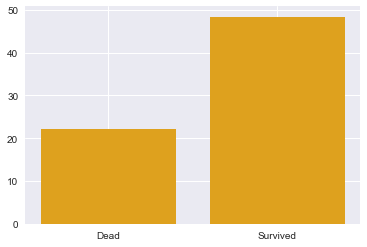

In [252]:
#Now since Fare has large range of values we will consider the mean fare to analyze against survival rate
dead = passenger_ds[passenger_ds['Survived'] == 0]["Fare"].mean()
survived = passenger_ds[passenger_ds['Survived'] == 1]["Fare"].mean()
plt.bar(['Dead','Survived'], [dead, survived], color='#DEA11E')
plt.show()

#### Observation : Passenger paying higher fare are more likely to survive. This can be related to the fact that people in higher class have better survival rate as seen above.

### Two dimensional analysis - Graphical

#### Age and Sex Vs Survival

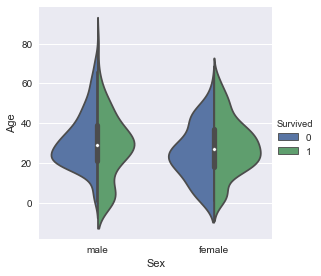

In [253]:
sns.factorplot(x="Sex", y="Age", hue="Survived", kind='violin', data=passenger_ds, split=True)

#### Observation : From above analysis it seems that female passengers of age group (20-40) have better survival rate than other females passengers. Males surviving range in age group 20-40. However it's again clear that female survival rate is higher than males.

#### Pclass and Sex Vs Survival

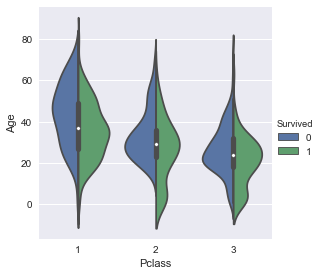

In [254]:
sns.factorplot(x="Pclass", y="Age", hue="Survived", kind='violin', data=passenger_ds, split=True)

#### Observation : From above analysis higher class passengers ageing between 20-40 have better survival rate than male passengers.

#### Embarked and Age Vs Survival

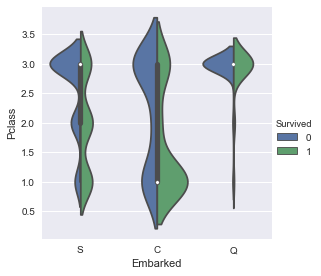

In [255]:
sns.factorplot(x="Embarked", y="Pclass", hue="Survived", kind='violin', data=passenger_ds, split=True)

#### Observation : From above analysis passengers from port 'C' have better survival rate than others.

### 4. Feature Engineering

##### a) Data Cleaning - As it can be seen from 2. Describing the data - Age has 177 null values. We will fill in with a random number between and mean and standard deviation so to achieve more accuracy compared to mean or median.


In [256]:
import numpy as np
mean= passenger_ds['Age'].mean()
std = passenger_ds['Age'].std()
emptyVal = passenger_ds['Age'].isnull().sum()
emptyValRand = np.random.randint(mean - std, mean + std, size=emptyVal)
passenger_ds['Age'][np.isnan(passenger_ds['Age'])] = emptyValRand
passenger_ds['Age'] = passenger_ds['Age'].astype(int)

#Checking the null values
passenger_ds.isnull().sum()

C:\Users\s2517457\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

##### Embarked - it has null values as seen below

In [257]:
passenger_ds.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [258]:
passenger_ds['Embarked'].value_counts()

#Since 'S' has the highest occurence we fill in null values with it.
passenger_ds['Embarked'] = passenger_ds['Embarked'].fillna('S')
passenger_ds.isnull().sum() #Perfect!

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

##### b) Dropping features

###### i) Looking at Section - 2 above - Cabin is a randomly generated alphanumeric string so it cannot be filled or cleaned with imputation. And since has 687 null values out of 891 it won't contribute much to correlation with survival. Hence it can be dropped

###### ii) Again ticket has too many unique values (681 out of 891) and won't yield set of categories to relate survival rate.

###### iii) PassenderID is a unqiue number and auto incrementing. It won't contribute since it's all unique values.


In [259]:
passenger_ds=passenger_ds.drop(['Cabin', 'Ticket', 'PassengerId'],axis=1)

In [260]:
#Confirm the contents of dataset
passenger_ds.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35,0,0,8.0500,S


##### c) Data Transformation

##### Sex - conversion from categorical to numerical

In [261]:
passenger_ds['Sex'] = passenger_ds['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

In [262]:
passenger_ds.head() #Perfect!

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",0,22,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",1,26,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",0,35,0,0,8.0500,S


##### Embarked - conversion from categorical to numerical

In [263]:
passenger_ds['Embarked'] = passenger_ds['Embarked'].map( {'S': 0, 'C': 1, 'Q':2} ).astype(int)

In [264]:
passenger_ds.head() #Embarked is converted to numerical

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",0,22,1,0,7.2500,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38,1,0,71.2833,1
2,1,3,"Heikkinen, Miss. Laina",1,26,0,0,7.9250,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35,1,0,53.1000,0
4,0,3,"Allen, Mr. William Henry",0,35,0,0,8.0500,0


##### Age - It has wide range of values so it would be wise to break it into buckets and then assign a number to each bucket so we can get few discreet values.

##### But before that let's analyze the distribution of Age along the survival rate.

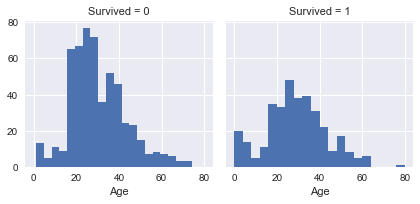

In [265]:
g = sns.FacetGrid(passenger_ds, col='Survived')
g.map(plt.hist, 'Age', bins=20)

##### Age has range from 0 to 80 (excluding 0)

##### Determining bucket size for Age range

In [266]:
#Test 1,2,3... till Survived below shows highest rate for better accuracy
bucketSize = 6 #6 is the winner
passenger_ds['AgeBucket']= pd.cut(passenger_ds['Age'], bucketSize)

passenger_ds[['AgeBucket', 'Survived']].groupby(['AgeBucket'], as_index=False).mean().sort_values('Survived', ascending=False)

,AgeBucket,Survived
0,"(-0.08, 13.333]",0.591549
2,"(26.667, 40.0]",0.398773
3,"(40.0, 53.333]",0.379310
4,"(53.333, 66.667]",0.348837
1,"(13.333, 26.667]",0.335366
5,"(66.667, 80.0]",0.142857


In [267]:
passenger_ds.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,AgeBucket
0,0,3,"Braund, Mr. Owen Harris",0,22,1,0,7.2500,0,"(13.333, 26.667]"
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38,1,0,71.2833,1,"(26.667, 40.0]"
2,1,3,"Heikkinen, Miss. Laina",1,26,0,0,7.9250,0,"(13.333, 26.667]"
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35,1,0,53.1000,0,"(26.667, 40.0]"
4,0,3,"Allen, Mr. William Henry",0,35,0,0,8.0500,0,"(26.667, 40.0]"


In [268]:
#Now we will discretize Age values based AgeBucket
passenger_ds.loc[ passenger_ds['Age'] <= 14, 'Age'] = 0
passenger_ds.loc[(passenger_ds['Age'] > 14) & (passenger_ds['Age'] <= 26), 'Age'] = 1
passenger_ds.loc[(passenger_ds['Age'] > 26) & (passenger_ds['Age'] <= 40), 'Age'] = 2
passenger_ds.loc[(passenger_ds['Age'] > 40) & (passenger_ds['Age'] <= 54), 'Age'] = 3
passenger_ds.loc[(passenger_ds['Age'] > 54) & (passenger_ds['Age'] <= 66), 'Age'] = 4
passenger_ds.loc[ passenger_ds['Age'] > 66, 'Age'] = 5

In [269]:
passenger_ds.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,AgeBucket
0,0,3,"Braund, Mr. Owen Harris",0,1,1,0,7.2500,0,"(13.333, 26.667]"
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,2,1,0,71.2833,1,"(26.667, 40.0]"
2,1,3,"Heikkinen, Miss. Laina",1,1,0,0,7.9250,0,"(13.333, 26.667]"
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2,1,0,53.1000,0,"(26.667, 40.0]"
4,0,3,"Allen, Mr. William Henry",0,2,0,0,8.0500,0,"(26.667, 40.0]"


##### Fare - applying bucketing to fare feature similar to age. 

In [270]:
bucketSize = 4 #4 is the winner
passenger_ds['FareBucket']= pd.cut(passenger_ds['Fare'], bucketSize)
passenger_ds[['FareBucket', 'Survived']].groupby(['FareBucket'], as_index=False).mean().sort_values('FareBucket', ascending=False)

,FareBucket,Survived
3,"(384.247, 512.329]",1.000000
2,"(256.165, 384.247]",0.666667
1,"(128.082, 256.165]",0.724138
0,"(-0.512, 128.082]",0.368113


In [271]:
passenger_ds.loc[ passenger_ds['Fare'] <= 0, 'Fare'] = 0
passenger_ds.loc[(passenger_ds['Fare'] > 0) & (passenger_ds['Fare'] <= 128), 'Fare'] = 1
passenger_ds.loc[(passenger_ds['Fare'] > 128) & (passenger_ds['Fare'] <= 256), 'Fare'] = 2
passenger_ds.loc[(passenger_ds['Fare'] > 256) & (passenger_ds['Fare'] <= 385), 'Fare'] = 3
passenger_ds.loc[(passenger_ds['Fare'] > 385) & (passenger_ds['Fare'] <= 512), 'Fare'] = 4
passenger_ds.loc[ passenger_ds['Fare'] > 512, 'Fare'] = 5

In [272]:
passenger_ds.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,AgeBucket,FareBucket
0,0,3,"Braund, Mr. Owen Harris",0,1,1,0,1.0,0,"(13.333, 26.667]","(-0.512, 128.082]"
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,2,1,0,1.0,1,"(26.667, 40.0]","(-0.512, 128.082]"
2,1,3,"Heikkinen, Miss. Laina",1,1,0,0,1.0,0,"(13.333, 26.667]","(-0.512, 128.082]"
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2,1,0,1.0,0,"(26.667, 40.0]","(-0.512, 128.082]"
4,0,3,"Allen, Mr. William Henry",0,2,0,0,1.0,0,"(26.667, 40.0]","(-0.512, 128.082]"


##### Dropping temporary features - AgeBucket and FareBucket

In [273]:
passenger_ds = passenger_ds.drop(['AgeBucket', 'FareBucket'], axis=1)
passenger_ds.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",0,1,1,0,1.0,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,2,1,0,1.0,1
2,1,3,"Heikkinen, Miss. Laina",1,1,0,0,1.0,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2,1,0,1.0,0
4,0,3,"Allen, Mr. William Henry",0,2,0,0,1.0,0


##### d) Feature Extraction - Name is the only remaining feature which has unique values except the title in it - which can be categorized and then converted to discreet numbers to correlate it with other features.

In [274]:
passenger_ds['Title'] = passenger_ds['Name'].str.extract(' ([A-Za-z]+)\.')
passenger_ds.head()

C:\Users\s2517457\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  """Entry point for launching an IPython kernel.


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,"Braund, Mr. Owen Harris",0,1,1,0,1.0,0,Mr
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,2,1,0,1.0,1,Mrs
2,1,3,"Heikkinen, Miss. Laina",1,1,0,0,1.0,0,Miss
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2,1,0,1.0,0,Mrs
4,0,3,"Allen, Mr. William Henry",0,2,0,0,1.0,0,Mr


In [275]:
#Looking at the frequency of each title value
passenger_ds.groupby('Title').Sex.count().sort_values()

Title
Capt          1
Ms            1
Mme           1
Lady          1
Jonkheer      1
Sir           1
Don           1
Countess      1
Major         2
Mlle          2
Col           2
Rev           6
Dr            7
Master       40
Mrs         125
Miss        182
Mr          517
Name: Sex, dtype: int64

In [276]:
pd.crosstab([passenger_ds['Title'], passenger_ds['Sex']], passenger_ds['Survived'])
#pd.pivot_table(passenger_ds, index=['Title'], aggfunc=len, fill_value=0)

Survived        0    1
Title    Sex          
Capt     0      1    0
Col      0      1    1
Countess 1      0    1
Don      0      1    0
Dr       0      4    2
         1      0    1
Jonkheer 0      1    0
Lady     1      0    1
Major    0      1    1
Master   0     17   23
Miss     1     55  127
Mlle     1      0    2
Mme      1      0    1
Mr       0    436   81
Mrs      1     26   99
Ms       1      0    1
Rev      0      6    0
Sir      0      0    1

##### Above table represents breakdown of titles among sex and correlation with survival.

##### Now we will discretize the values from categorical form.

In [277]:
#Clubbing the low count values and Ms with Miss
passenger_ds['Title'] = passenger_ds['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona', 'Mlle', 'Mme'], 'Other')
passenger_ds['Title'] = passenger_ds['Title'].replace('Ms', 'Miss')

In [278]:
#Discretization similar to Sex and Emabrked
passenger_ds['Title'] = passenger_ds['Title'].map({"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Other": 5})

In [279]:
passenger_ds.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,"Braund, Mr. Owen Harris",0,1,1,0,1.0,0,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,2,1,0,1.0,1,3
2,1,3,"Heikkinen, Miss. Laina",1,1,0,0,1.0,0,2
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2,1,0,1.0,0,3
4,0,3,"Allen, Mr. William Henry",0,2,0,0,1.0,0,1


###### Now we can safely drop Name feature

In [280]:
passenger_ds = passenger_ds.drop('Name', axis=1)
passenger_ds.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,1,1,0,1.0,0,1
1,1,1,1,2,1,0,1.0,1,3
2,1,3,1,1,0,0,1.0,0,2
3,1,1,1,2,1,0,1.0,0,3
4,0,3,0,2,0,0,1.0,0,1


##### SipSp and Parch are the reamaining features - As per the definition of columns both the columns relate to family size - so this feature can be tranformed to a single passenger or passenger with family

In [281]:
#Adding new feature to determine family length (1 or more)
passenger_ds['FamilyLen'] = passenger_ds['SibSp'] +  passenger_ds['Parch'] + 1
passenger_ds.head()
#Pivotal analysis to correlate length and survival
passenger_ds[['FamilyLen', 'Survived']].groupby(['FamilyLen'], as_index=False).mean().sort_values('Survived', ascending=False)


,FamilyLen,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


###### A family of size 2-4 has better survival rate than being alone or large family. So let's create 3 values : Single, small family and large family

In [282]:
passenger_ds['Single'] = passenger_ds['FamilyLen'].map(lambda s: 1 if s == 1 else 0)
passenger_ds['SmallFamily'] = passenger_ds['FamilyLen'].map(lambda s: 1 if 2 <= s <= 4 else 0)
passenger_ds['LargeFamily'] = passenger_ds['FamilyLen'].map(lambda s: 1 if 5 <= s else 0)

In [283]:
passenger_ds.head()
#Converting Fare to int
passenger_ds = passenger_ds[['Survived','Pclass','Sex','Age','SibSp','Parch','Fare','Embarked','Title','FamilyLen','Single','SmallFamily','LargeFamily']].astype(int)
passenger_ds.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilyLen,Single,SmallFamily,LargeFamily
0,0,3,0,1,1,0,1,0,1,2,0,1,0
1,1,1,1,2,1,0,1,1,3,2,0,1,0
2,1,3,1,1,0,0,1,0,2,1,1,0,0
3,1,1,1,2,1,0,1,0,3,2,0,1,0
4,0,3,0,2,0,0,1,0,1,1,1,0,0


In [284]:
#Dropping FamilyLen as it's not needed anymore
passenger_ds = passenger_ds.drop(['FamilyLen'], axis=1)
passenger_ds.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Single,SmallFamily,LargeFamily
0,0,3,0,1,1,0,1,0,1,0,1,0
1,1,1,1,2,1,0,1,1,3,0,1,0
2,1,3,1,1,0,0,1,0,2,1,0,0
3,1,1,1,2,1,0,1,0,3,0,1,0
4,0,3,0,2,0,0,1,0,1,1,0,0


### Correlation matrix

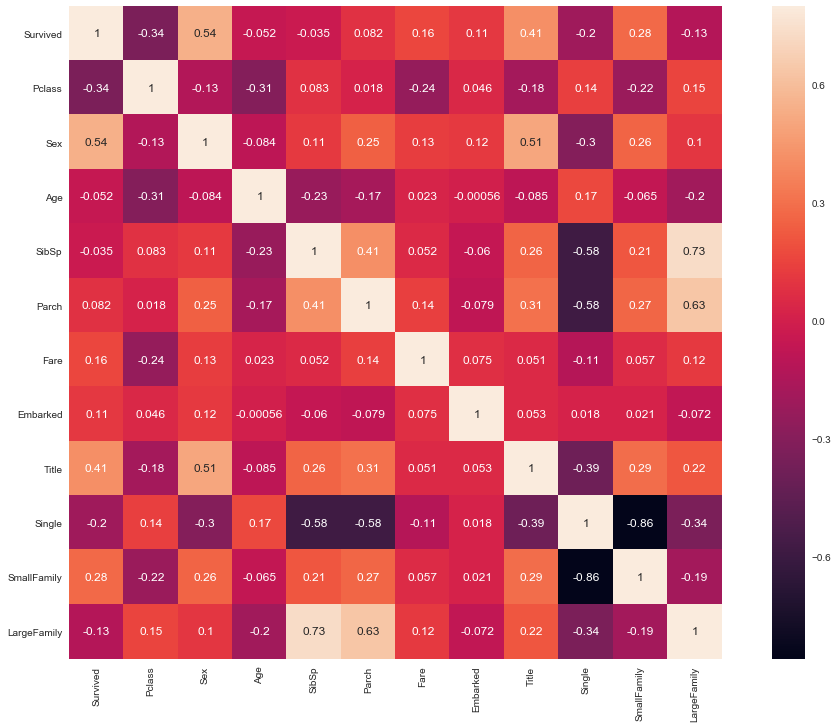

In [285]:
corr = passenger_ds.corr()
plt.figure(figsize = (18,12))
sns.heatmap(passenger_ds.corr(), vmax=0.8, square=True, annot=True)

#### After all the analysis, cleaning, transformation and feature selection below are the observational outcomes:

##### Important features based on above correlation matrix: Sex, Pclass, Fare, Family Size, Embarked, Age 

##### a) Females travelling in have better survival rate than males.

##### b) Passengers travelling in higher class have better survival rate.

##### c) Passengers boarding from 'C' have better survival rate.

##### d) Passengers paying higher fare have better survival rate.

##### e) Passengers with small family size (2-4) have better survival rate than large family or singletons.

#### So overall it can be concluded that female passengers travelling in higher classes(covers high fare) emabarking from 'C' and ageing between 20-40 will have the highest survival chance.

### Questions:

#### 1. What other attributes did you use for the analysis? Explain how you used them. Provide a complete list of all attributes used.

##### Emabarked, Fare, SibSp, Parch and Name are used apart from Pclass, Age, Sex. 
#####  a) SibSp and Parch are used to determine family size to correlate it to survival rate.
#####  b) Embarking port has a bearing on survival rate as well.
#####  c) Fare feature is has a positive correlation to Survival as seen above and it related to Pclass as well.
#####  d) Name has unique values but common titles can be extracted and discretized to correlate.

#### 2. Did you engineer any attributes? If yes, explain the rationale and how the new attributes were used in the analysis?

##### Yes FamilyLen is a new feature to determine family size. Age and Fare are reengineered by dividing them into buckets and then assigning them discreet values. Sex and Embarked are converted from categorical to numerical. Name feature is used to generate Title feature and then discretizing it with numerical values.

#### 3. If you have excluded any attributes from the analysis, provide an explanation why you believe they can be excluded

##### Cabin - Too many null values
##### Ticket - Random number and too many unique values
##### PassengerID - All unique values

#### 4. How did you treat missing values? Provide a detailed explanation in the comments.

##### Age - used a random value between mean and standard deviation to achieve higher accuracy than just mean or median

##### Emabrked - used most frequently occuring value to fill in nulls.